# Aula 01 - Alunas e alunos com JSON

## Lendo nomes com JSON

In [54]:
import pandas as pd
import numpy as np

In [2]:
# Leitura dos dados json
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [3]:
# Amostras
nomes_f.sample(13)

,nome,regiao,freq,rank,sexo
17,LUCIANA,0,429769,18,F
156,YASMIN,0,103787,157,F
163,REGIANE,0,96432,164,F
159,SELMA,0,102116,160,F
14,JESSICA,0,456472,15,F
80,TAIS,0,201501,81,F
98,THAIS,0,168816,99,F
39,ROSA,0,306336,40,F
56,SUELI,0,243899,57,F
49,ANGELA,0,278058,50,F


In [4]:
# Amostras
nomes_m.sample(13)

,nome,regiao,freq,rank,sexo
89,JEAN,0,158198,90,M
121,ADEMIR,0,122923,122,M
68,CAIO,0,225902,69,M
147,ALISSON,0,94270,148,M
113,VICENTE,0,125974,114,M
136,NILTON,0,104846,137,M
114,ARTHUR,0,125788,115,M
177,CLAUDINEI,0,74264,178,M
27,GUILHERME,0,525028,28,M
93,ADILSON,0,155002,94,M


In [5]:
# Quantidade total de nomes
print(f'Quantidade de nomes: {len(nomes_f) + len(nomes_m)}')
print(f'Quantidade de nomes: {nomes_f.shape[0] + nomes_m.shape[0]}')

Quantidade de nomes: 400
Quantidade de nomes: 400


In [6]:
# Concatenando o campo 'nome' dos dataframes
frames = [nomes_f, nomes_m]
nomes = pd.concat(frames, ignore_index=True)['nome'].to_frame()
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
395,WALTER
396,ARLINDO
397,MICHAEL
398,ALVARO


## Incluindo ID dos alunos

In [7]:
import numpy as np
np.random.seed(123)

In [8]:
total_alunos = len(nomes)
total_alunos

400

In [9]:
nomes['id_aluno'] = np.random.permutation(total_alunos)

In [10]:
nomes

,nome,id_aluno
0,MARIA,234
1,ANA,42
2,FRANCISCA,303
3,ANTONIA,155
4,ADRIANA,342
...,...,...
395,WALTER,230
396,ARLINDO,98
397,MICHAEL,322
398,ALVARO,382


In [11]:
# Criando e-mails
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes.head(15)

,nome,id_aluno,dominio
0,MARIA,234,@dominiodoemail.com.br
1,ANA,42,@servicodoemail.com
2,FRANCISCA,303,@servicodoemail.com
3,ANTONIA,155,@servicodoemail.com
4,ADRIANA,342,@servicodoemail.com
5,JULIANA,309,@dominiodoemail.com.br
6,MARCIA,54,@dominiodoemail.com.br
7,FERNANDA,287,@dominiodoemail.com.br
8,PATRICIA,378,@servicodoemail.com
9,ALINE,91,@servicodoemail.com


In [12]:
nomes['email'] = (nomes['nome'] + nomes['dominio']).str.lower()
nomes

,nome,id_aluno,dominio,email
0,MARIA,234,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,42,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,303,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,155,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,342,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
395,WALTER,230,@dominiodoemail.com.br,walter@dominiodoemail.com.br
396,ARLINDO,98,@servicodoemail.com,arlindo@servicodoemail.com
397,MICHAEL,322,@dominiodoemail.com.br,michael@dominiodoemail.com.br
398,ALVARO,382,@servicodoemail.com,alvaro@servicodoemail.com


# Aula 02 - Criando cursos lendo HTML

## Criando cursos

In [14]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [15]:
# DataFrame de cursos
cursos = cursos[0]
type(cursos)

pandas.core.frame.DataFrame

In [16]:
cursos.head(10)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


## Alterando o index

In [17]:
# Renomeando a coluna "Nome do curso"
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [18]:
# Criando id
cursos['id'] = cursos.index + 1
cursos.head(5)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [20]:
# id como index
cursos = cursos.set_index('id')

In [21]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Aula 03 - Escrevendo CSV, JSON e HTML

## Matriculando alunas e alunos

In [22]:
nomes.sample(5)

,nome,id_aluno,dominio,email
46,FABIANA,357,@servicodoemail.com,fabiana@servicodoemail.com
238,DIEGO,293,@dominiodoemail.com.br,diego@dominiodoemail.com.br
336,NILTON,270,@dominiodoemail.com.br,nilton@dominiodoemail.com.br
319,MOISES,3,@servicodoemail.com,moises@servicodoemail.com
101,GISELE,297,@servicodoemail.com,gisele@servicodoemail.com


In [27]:
# Criando a coluna matriculas (qtd de cursos nos quais os alunos estão matriculadoss)
nomes['matriculas'] = np.ceil((np.random.exponential(size=total_alunos) * 1.5)).astype(int)

In [37]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
31,JOSEFA,102,@servicodoemail.com,josefa@servicodoemail.com,1
289,JEAN,88,@dominiodoemail.com.br,jean@dominiodoemail.com.br,2
167,TAINARA,127,@dominiodoemail.com.br,tainara@dominiodoemail.com.br,4
67,PAULA,211,@dominiodoemail.com.br,paula@dominiodoemail.com.br,2
307,VAGNER,14,@dominiodoemail.com.br,vagner@dominiodoemail.com.br,4


In [38]:
# Estatísticas de matrícula
nomes.matriculas.describe()

count    400.000000
mean       2.130000
std        1.539163
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

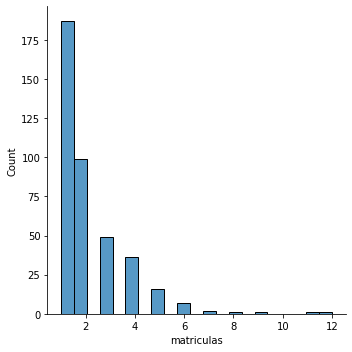

In [40]:
# Gráfico dos matriculados
import seaborn as sns

sns.displot(nomes.matriculas)

In [41]:
# Qtd de matrículas
nomes.matriculas.value_counts()

1     187
2      99
3      49
4      36
5      16
6       7
7       2
12      1
8       1
9       1
11      1
Name: matriculas, dtype: int64

## Selecionando os cursos

In [42]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
362,ISMAEL,99,@servicodoemail.com,ismael@servicodoemail.com,1
141,NEIDE,324,@servicodoemail.com,neide@servicodoemail.com,1
274,ALAN,354,@dominiodoemail.com.br,alan@dominiodoemail.com.br,1
252,SAMUEL,219,@dominiodoemail.com.br,samuel@dominiodoemail.com.br,2
8,PATRICIA,378,@servicodoemail.com,patricia@servicodoemail.com,2


In [52]:
cursos.head(10)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [48]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)      # Associa a cada valor de x uma probabilidade de ocorrência

In [55]:
# DataFrame com id do aluno e id dos cursos em que ele está matriculado
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p=prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [59]:
matriculas.head(10)

,id_aluno,id_curso
0,234,13
1,234,3
2,234,5
3,234,16
4,234,12
5,42,10
6,42,1
7,303,9
8,155,9
9,155,12


In [62]:
# Contando o número de alunos
matriculas.groupby('id_curso').count()

,id_aluno
id_curso,
1,144
2,141
3,84
4,9
5,143
6,15
7,5
8,105
9,120


In [68]:
# Juntando numero de alunos e o nome dos cursos
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'qtd_de_alunos'})
matriculas_por_curso

,qtd_de_alunos,nome_do_curso
id_curso,,
1,144,Lógica de programação
2,141,Java para Web
3,84,C# para Web
4,9,Ruby on Rails
5,143,Cursos de Python
6,15,PHP com MySql
7,5,.NET para web
8,105,Novas integrações com Java
9,120,TDD com Java


In [65]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
128,JOICE,356,@servicodoemail.com,joice@servicodoemail.com,3
248,RENATO,383,@servicodoemail.com,renato@servicodoemail.com,11
279,VALDIR,306,@servicodoemail.com,valdir@servicodoemail.com,4


In [66]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [67]:
matriculas.head()

,id_aluno,id_curso
0,234,13
1,234,3
2,234,5
3,234,16
4,234,12


In [70]:
matriculas_por_curso.head()

,qtd_de_alunos,nome_do_curso
id_curso,,
1,144,Lógica de programação
2,141,Java para Web
3,84,C# para Web
4,9,Ruby on Rails
5,143,Cursos de Python


## Saída em diferentes formatos

In [71]:
# Exportando como CSV
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [73]:
# Exportando como JSON
matriculas_json = matriculas_por_curso.to_json(force_ascii=False)
matriculas_json

'{"qtd_de_alunos":{"1":144,"2":141,"3":84,"4":9,"5":143,"6":15,"7":5,"8":105,"9":120,"10":104,"11":84,"12":47,"13":103,"14":121,"15":49,"16":70,"17":106,"18":126,"19":109,"20":19},"nome_do_curso":{"1":"Lógica de programação","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integrações com Java","9":"TDD com Java","10":"Código limpo com C#","11":"Preparatório para certificação Java","12":"Hardware básico","13":"Persistência com .NET","14":"Desenvolvendo jogos","15":"Análise de dados","16":"Estatística básica","17":"Internet das coisas","18":"Programação funcional","19":"Boas práticas em Java","20":"Orientação objetos com Java"}}'

In [74]:
# Exportando como HTML
matriculas_html = matriculas_por_curso.to_html()
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>qtd_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>144</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>141</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>84</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>9</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>143</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>15</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>5</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>105</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>120</td>
    